In [1]:
# Importing libraries
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.feature as cfeature
import cartopy.feature as cf

# open the data set
ds = xr.open_dataset("/work/uo1075/u301680/tas_data/data_reserve/tas_1850_2014.nc")

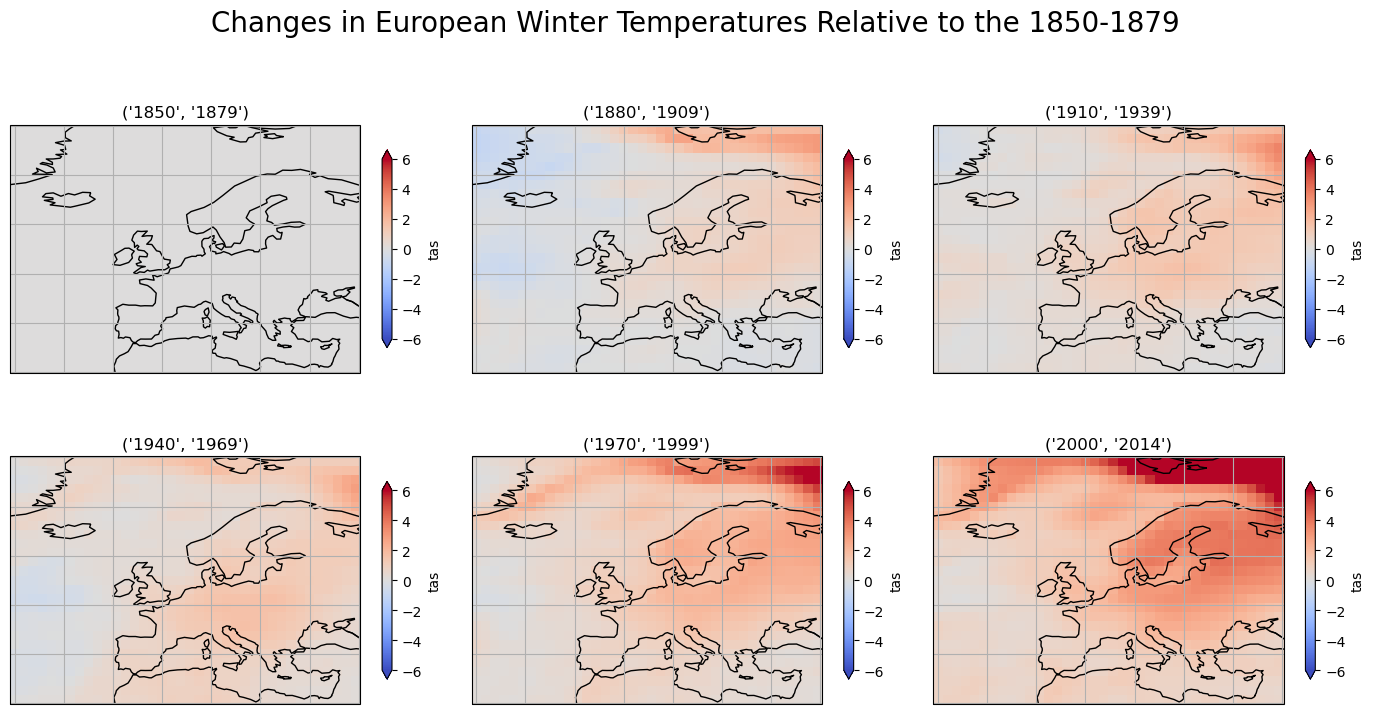

In [2]:
# Open the dataset after cutting the file which includes only  europe 
ds = xr.open_dataset("/work/uo1075/u301680/tas_data/data_reserve/tas_europe.nc")


# Select time periods
periods = [('1850', '1879'), ('1880', '1909'), ('1910', '1939'),
           ('1940', '1969'), ('1970', '1999'), ('2000', '2014')]

# Calculate seasonal means for each period
climatology = []
for period in periods:
    data = ds.sel(time=slice(*period))
    clim = data['tas'].groupby('time.season').mean('time').sel(season="DJF")
    climatology.append(clim)

# Calculate differences from the reference period
diffs = [clim -climatology[0] for clim in climatology]

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Create a figure and axes with Cartopy projection
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8), subplot_kw={'projection': projection})

# # Add coastlines and gridlines to the axes
for ax in axes.flat:
    ax.coastlines()
    ax.gridlines()

# Plot the differences using subplots
for i, ax in enumerate(axes.flat):
    diff = diffs[i]
    cs = diff.plot(ax=ax, transform=projection, cmap='coolwarm', vmin=-6, vmax=6, cbar_kwargs={"shrink": 0.5},extend='both')
    ax.set_title(periods[i])
    fig.suptitle('Changes in European Winter Temperatures Relative to the 1850-1879', fontsize=20)

    
plt.tight_layout()
#plt.savefig('mstvSAT')
plt.show()